In [43]:
%matplotlib inline
import re
from scipy.io import loadmat
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.signal import chirp, correlate, find_peaks, hilbert


class LunkaProcessing():
    def __init__(self, 
                 Lunka = None):
        self.Lunka = Lunka #сам подгружаемый файл
    
    def open_mat_file(self):
        mat = loadmat(self.Lunka) #конвертируем при помощи scipy
        mat = {k: v for k, v in mat.items() if k[0] != '_'} #препроцессинг
        self.data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()}) #передаем его в пандас
        self.index = int(re.findall('\d+', self.Lunka)[0])
        return self.data
    
    def initial_plot(self):
        plt.figure(figsize=(12, 8))
        plt.plot(self.data['t'], self.data['y']) #хотим построить график
        plt.xlabel('Время, с')
        plt.ylabel('Амплитуда')
        plt.title(f'График исходных данных (лунка {self.index})')
        plt.savefig(f'График исходных данных (лунка_{self.index}).png')
        plt.legend()
    
    def corr_function(self):
        Fs_=40175
        t_max=10
        t0_new=np.arange(0, t_max, 1/Fs_)
        s0_new=chirp(t0_new, f0=400, t1=t_max, f1=10000)
        self.B_new = correlate(data['y'], s0_new, mode='full')
        
    def corr_plot(self):
        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(self.B_new.shape[0]), self.B_new)
        plt.xlabel('Отсчеты')
        plt.ylabel('Корреляционная функция')
        plt.title(f'Корреляционная функция (лунка {self.index})')
        plt.legend()
        plt.savefig(f'Корреляционная функция (лунка_{self.index}).png')
        plt.show()
    
    def find_our_peaks(self):
        peaks, _ = find_peaks(self.B_new, height=max(abs(B_new))*0.6)
        diff = []
        for i in np.arange(len(peaks)-1):
            g = peaks[i+1] - peaks[i]
            diff.append(g)
        peaks_new = []
        for j in list(np.where(diff > np.average(diff))[0]):
            peaks_new.append(peaks[j])
        if diff[-1]<np.average(diff): #если расстояние между изначально полученными пиками для полседнего меньше среднего, то добавим его вручную
            peaks_new.append(peaks[-1])
        self.peaks_new = peaks_new
        
    def plot_peaks(self):  
        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(self.B_new.shape[0]), self.B_new)
        plt.plot(self.peaks_new, self.B_new[self.peaks_new], "x")
        plt.plot(np.zeros_like(self.B_new), "--", color="gray")
        plt.xlabel('Отсчеты')
        plt.ylabel('Корреляционная функция')
        plt.title(f'Корреляционная функция с найденными пиками (лунка {self.index})')
        plt.legend()
        plt.savefig(f'Корреляционная функция с найденными пиками (лунка_{self.index}).png')
        plt.show()
        
    
    def hilbert_processing(self):
        i_1, i_2 = [], []
        for k  in np.arange(len(self.peaks_new)):
            i1 = self.peaks_new[k]-1e3
            i2 = self.peaks_new[k]+1e3
            i_1.append(i1)
            i_2.append(i2)  
        b_final =[]
        for k1, k2 in list(zip(i_1, i_2)):
            b_final.append(B_new[int(k1):int(k2)])
        self.b_final = b_final

    def hilbert_plot(self):        
        plt.figure(figsize=(12, 8))
        for a in np.arange(abs(hilbert(self.b_final)).shape[0]):
            plt.plot(np.arange(abs(hilbert(self.b_final)).shape[1]), 20*np.log10(abs(hilbert(self.b_final))[a]), label=f'Сигнал{a+1}')
        plt.xlabel('Отсчеты')
        plt.ylabel('Уровень шума, дБ')
        plt.title(f'Сигналы (лунка {self.index})')
        plt.legend()
        plt.savefig(f'Сигналы (лунка {self.index}).png')
        plt.show()

    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


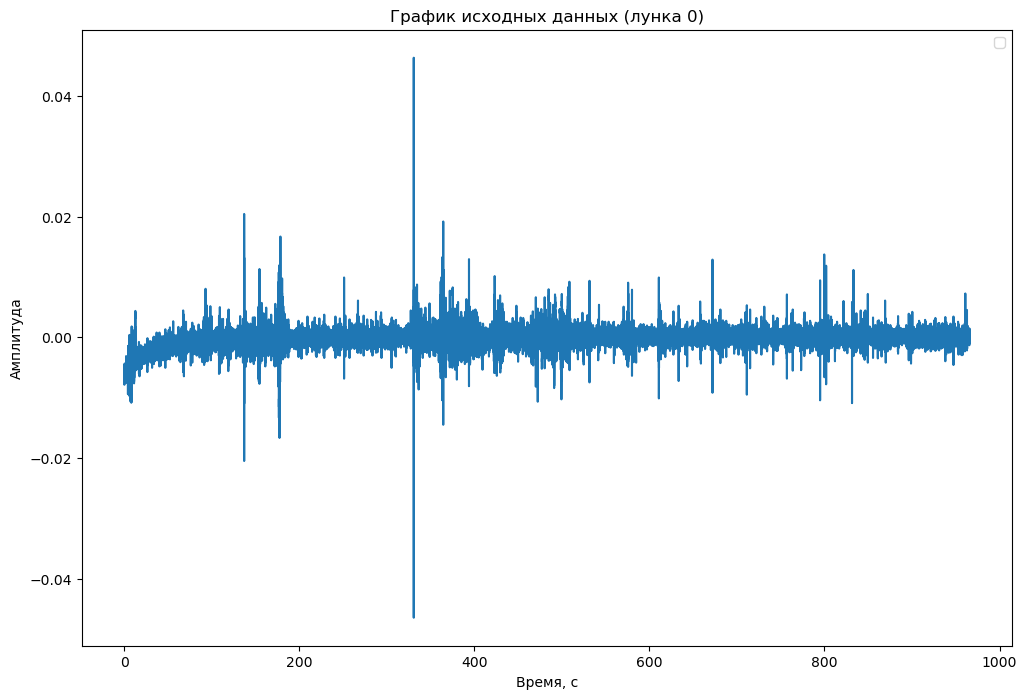

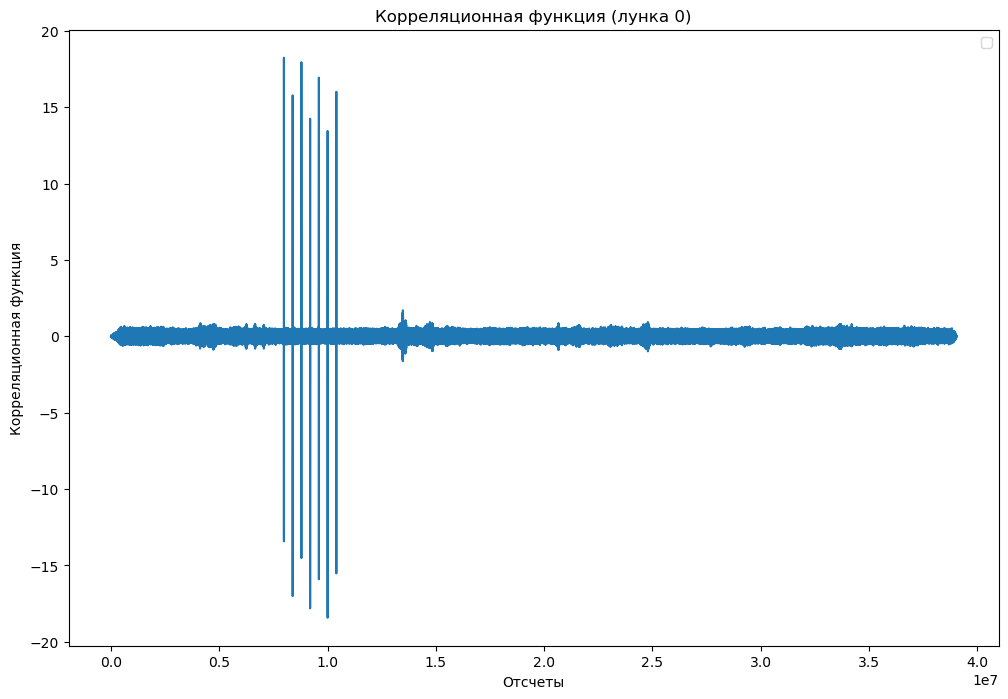

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


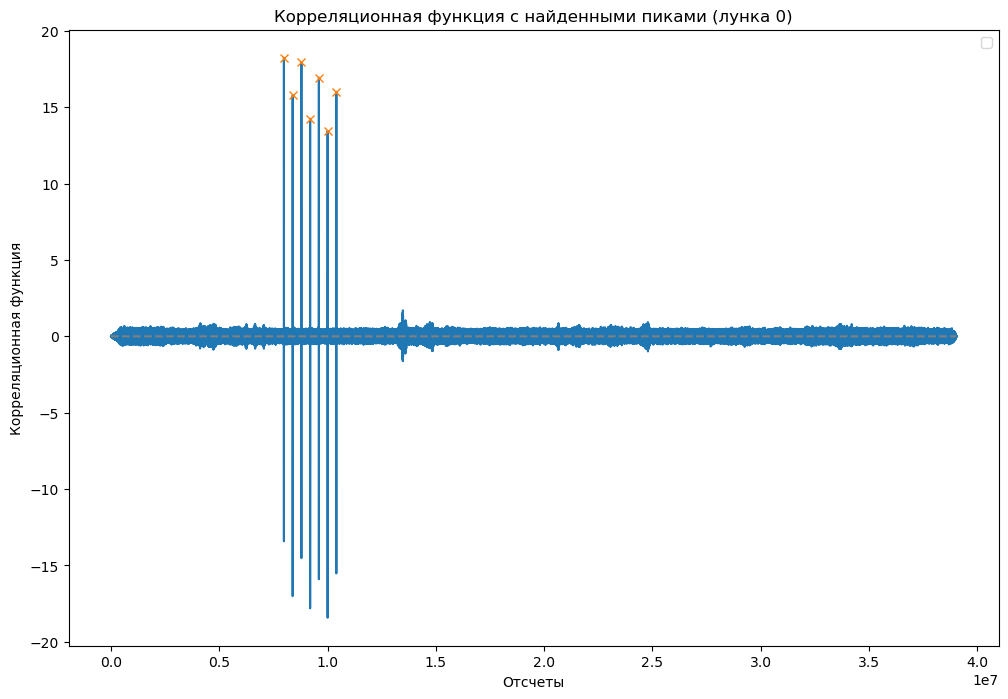

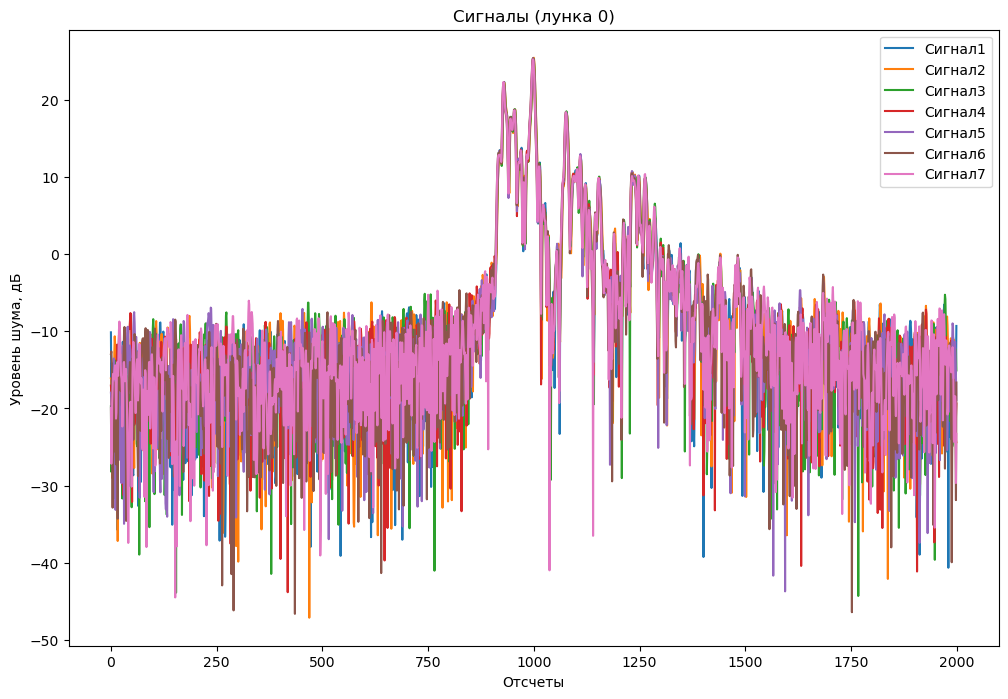

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


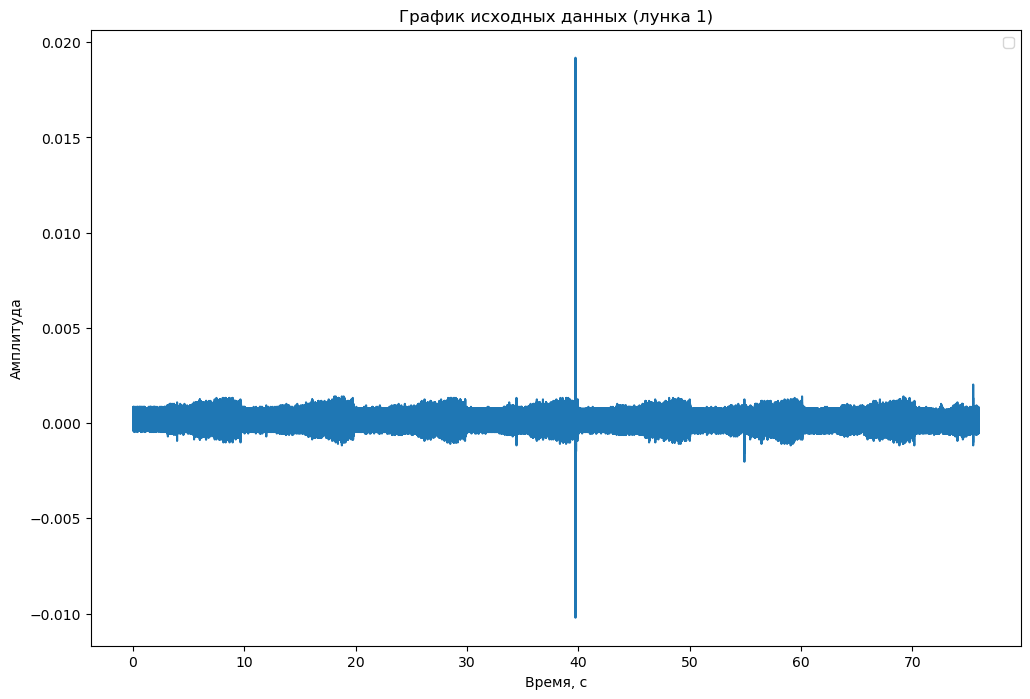

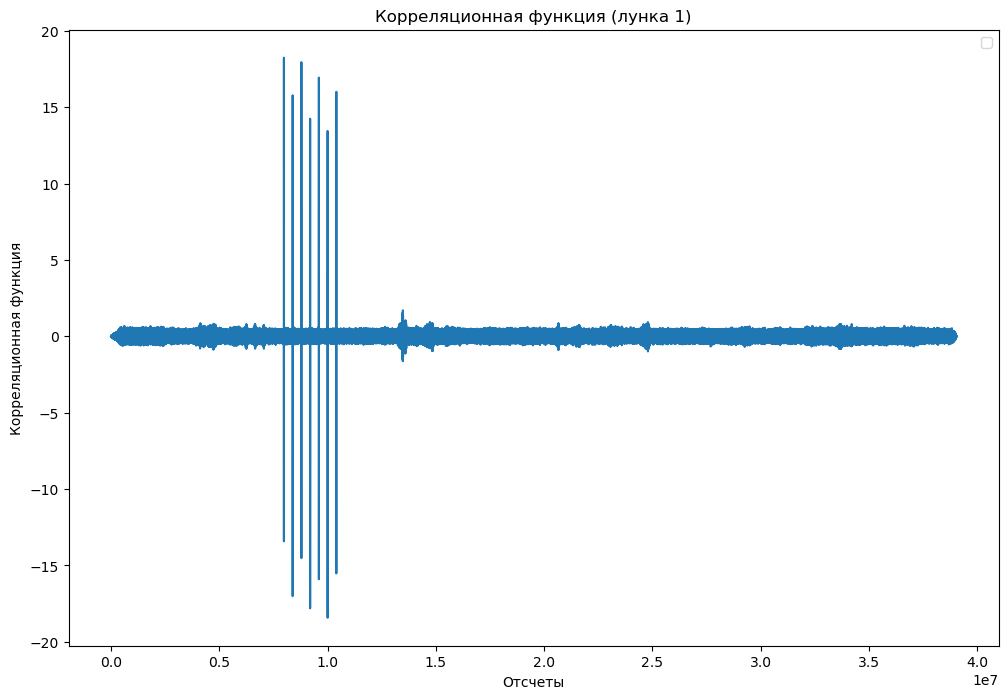

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


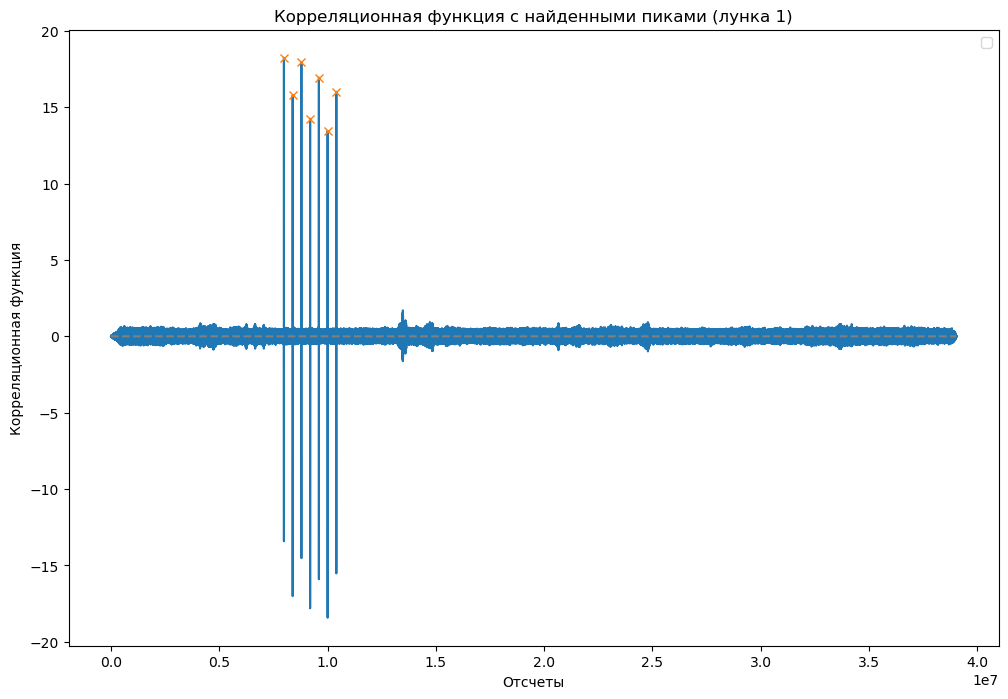

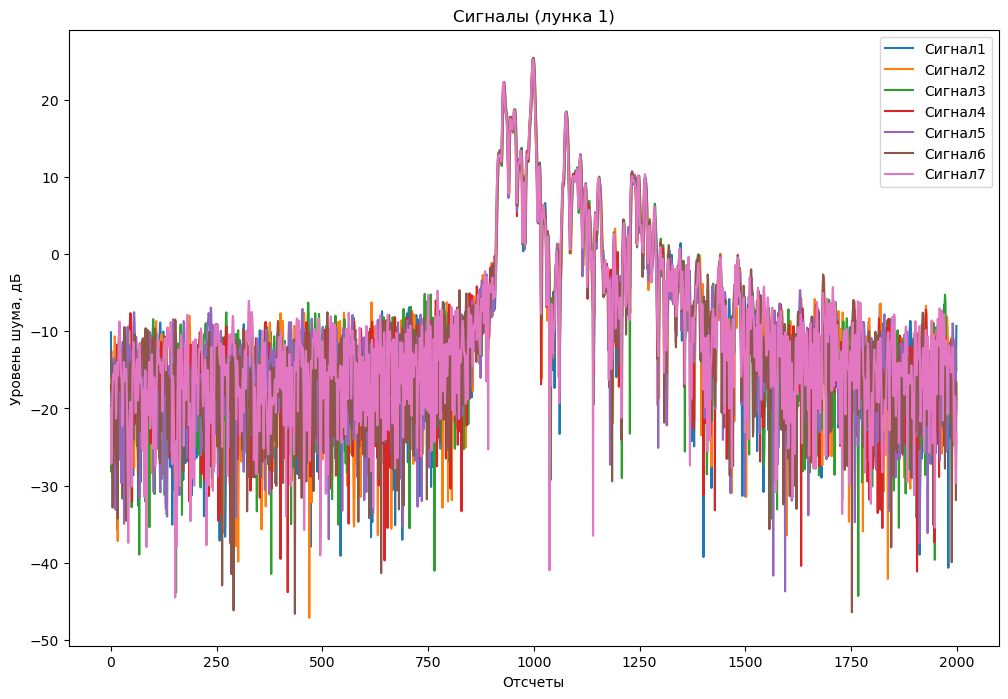

CPU times: total: 3min 55s
Wall time: 3min 55s


In [44]:
%%time
ls_list = [] 
for i in np.arange(2):
    lk = LunkaProcessing(f"Lunka_{i}.mat") 
    ls_list.append(lk)
    ls_list[i].open_mat_file()
    ls_list[i].initial_plot()
    ls_list[i].corr_function()
    ls_list[i].corr_plot()
    ls_list[i].find_our_peaks()
    ls_list[i].plot_peaks()
    ls_list[i].hilbert_processing()
    ls_list[i].hilbert_plot()